# Drunkard's Walk
Physics 177, Spring 2018  
17 May 2018

Stephen Iota

## Discussion

This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi. 

The drunkard's walk is an example of a **stochastic** system---that's just a fancy way of saying that randomness plays a key role. A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, we will use Python's `random` library to code the drunkard's walk in an array.

**Note**: Random (drunk) walks are the simplest example of a **Markov chain**. In this problem, however, we will not be using it as a Markov chain---we're assigning some physical meaning to the initial condition and examining the walk as an actual time evolution. 

## Problem 1: Drunk walking in one dimension

## 1a. Filling out the positions

Code for a *drunkard's walk* with a number of steps `nSteps = 100`. The output is an array `xs` of length `nSteps` that contains the ordered list of positions that the drunkard has visited. For example, `xs[5]` is the $x$-position of the drunkard at the fifth step. Assume the drunkard starts at zero.

In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

nSteps = 100
x = 0
xs = []

# each step: drunkard moves one unit in a random direction
for i in range(nSteps):
    xs.append(x)
    x += random.randrange(-1,2,2)

#print(xs)

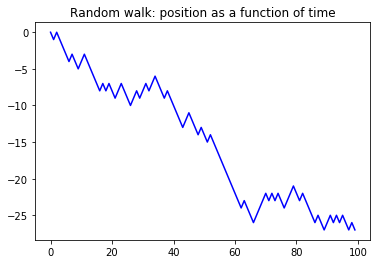

In [2]:
plt.title("Random walk: position as a function of time")
plt.plot(np.arange(nSteps), xs, 'b-')
plt.show()

## 1b. The squared position

The drunkard moves forward and backward. Very clearly the average position is $\langle x \rangle = 0$, even though the drunkard can sometimes go very far from zero. A good measure of how far the drunkard is from the origin is the square of the position.

**Cute trick**: use `for xi in xs:` as a for loop.

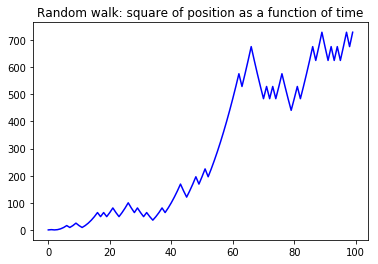

In [3]:
x2s = []

for i in xs:
    x2s.append((i)**2)

#print(x2s)
plt.title("Random walk: square of position as a function of time")
plt.plot(np.arange(nSteps), x2s, 'b-')
plt.show()

## 1c. Random Walk Is Random

If we run Problem 1a and 1b a few times, we'll notice that you can get some very different looking plots. In this step, consider not one, but `nDrunk = 1000` drunkards. These are non-interacting drunkards (very unrealistic, I know) so that they move independently of one another. In other words, we can think of them an an ensemble of individual drunk walkers. 

As we can expect, $\langle x \rangle = 0$. However, things become more interesting if you examine $\langle x^2(t) \rangle$.  

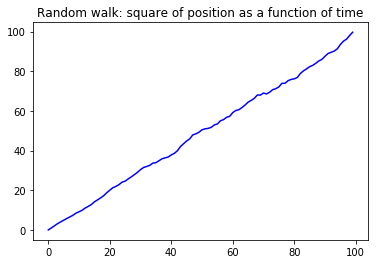

In [4]:
nDrunk = 1000
nSteps = 100
x2s_all_matrix = np.zeros((nSteps,nDrunk))
x2s_ave = np.zeros(nSteps)

for i in range(nDrunk):     # For each Drunkard
    position = 0
    xs = []
    x2s = []
    
    for j in range(nSteps): # Generates a random walk for the "ith" Drunkard
        xs.append(position)
        position += random.randrange(-1,2,2)
    for k in xs:            # Squared position for "ith" Drunkard
        x2s.append(k*k)
        
    x2s_all_matrix[:,i] = x2s # Each column is a different Drunkard's squared position
        
for n in range(nDrunk):
    x2s_ave += x2s_all_matrix[:,n]
x2s_ave = x2s_ave / nDrunk
        
#print(x2s_ave)
#print(x2s_all_matrix)
plt.title("Random walk: square of position as a function of time")
plt.plot(np.arange(nSteps), x2s_ave, 'b-')
plt.show()

## 1d. The thinking part

Mathematically the 1D random/drunkard's walk gives:

$$\langle x^2 \rangle = 2Dt,$$

where $D$ is the **diffusion** constant.

For a nice derivation of the diffusion equation from the drunkard's walk (and an explanation for the factor of 2), see these slides: http://nebula.physics.uakron.edu/dept/faculty/jutta/modeling/diff_eqn.pdf

You'll also note that the precise value of $D$ is really a proportionality constant between space and time. In otherwords, it amounts to a choice of units. 

$D$ is the diffusion constant for our drunk walk equation. 
$$D = \frac {2*length^2}{time}$$
In our case, we can say $ time = nSteps $, then our $D \approx 0.5 \frac{l^2}{t}$

## 2. Pairs of Drunks

Consider the case of pairs of drunkards. Plot the average value of their separation, $\langle(x_A -x_B)**2\rangle$. Does this separation grow faster or slower than the separation from the origin for a single walker? In other words, after 100 steps, is a drunkard closer to the origin or closer to the other drunkard who started at the same pub but wandered off independently?

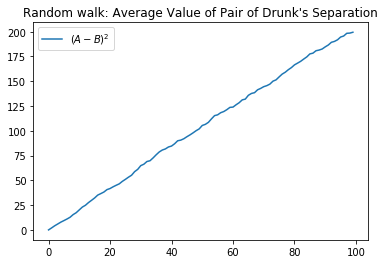

In [29]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

nSteps = 100
nTrials = 1000
all_drunkA = []
all_drunkB = []
separation = np.zeros((nSteps, nTrials))
ave_separation = np.zeros(nSteps)

for n in range(nTrials):      # (n) Trials
    drunkA = []
    drunkB = []
    A_step = B_step = 0
    for i in range(nSteps):   # Creating Drunk A & Drunk B
        drunkA.append(A_step)
        drunkB.append(B_step)
        A_step += random.randrange(-1,2,2)
        B_step += random.randrange(-1,2,2)
        
    separation[:,n] = (np.subtract(drunkA,drunkB))**2  # Storing (A-B)**2 in a 2D Matrix

for j in range(nTrials):     # 
    ave_separation += separation[:,j]
ave_separation = ave_separation / nTrials
        
plt.plot(np.arange(nSteps),ave_separation,label='$ (A-B)^2 $')
plt.title("Random walk: Average Value of Pair of Drunk's Separation")
plt.legend()
plt.show()

A pair of drunks separate **$2 x$** as fast from each other than they do from the origin